In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ds_salaries.csv')

# 1

a) H0 - the percentage of works in the data sector that works from home is 35%.
H1 - the percentage of works in the data sector that works from home is less 35%

b) 

In [2]:
where_work_col = df.remote_ratio
test_statistic = np.count_nonzero(where_work_col == 'fully remote') / np.count_nonzero(where_work_col)
test_statistic

0.3246006389776358

the test satistic is the  percentage of remote workers in the sample

c) 

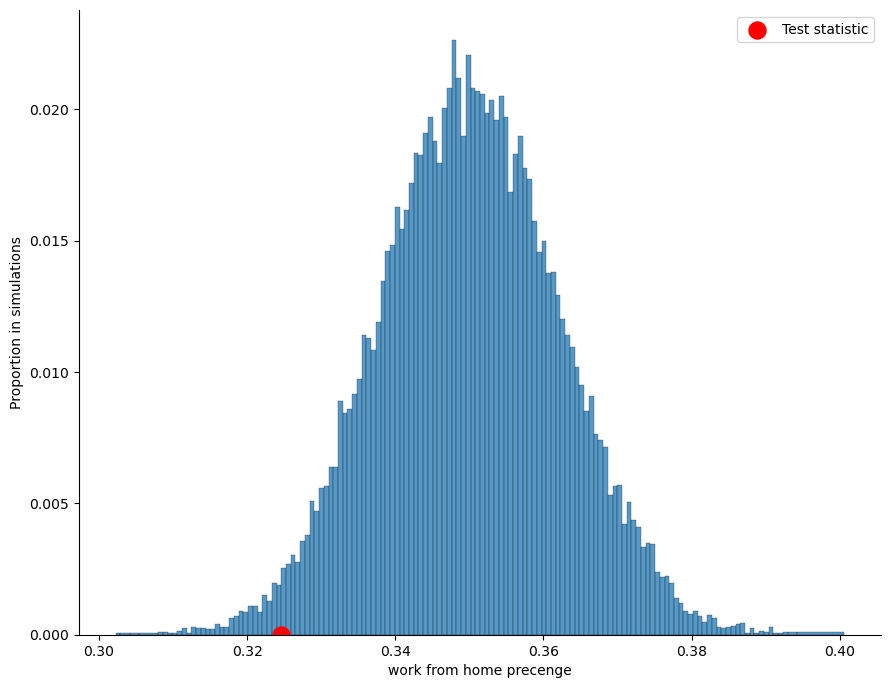

In [3]:
sample_size = sample_size=df.shape[0]
where_work = ['hybrid', 'fully remote']
prob = [0.65, 0.35]

# sample one value
def sample_remote_ratio():
    sample_workes = np.random.choice(where_work, p=prob, size=sample_size)
    num_remote_workers = np.count_nonzero(sample_workes == 'fully remote')
    return num_remote_workers/sample_size

# run multiple simulations
num_repetitions = 20000
work_remote_precenges = np.array([sample_remote_ratio() for i in range(num_repetitions)])

# visualize
facetgrid_obj = sns.displot(work_remote_precenges, bins=np.unique(work_remote_precenges), stat='probability') # Defining the bins
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='', xlabel=f'work from home precenge', ylabel='Proportion in simulations')

#Add a red point on the plot marking our data
facetgrid_obj.axes[0, 0].scatter(test_statistic, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Test statistic'])


In [4]:
count_fewer_than_035 = np.count_nonzero(work_remote_precenges <= test_statistic)
print ('The p-value is', count_fewer_than_035/len(work_remote_precenges))

The p-value is 0.0185


d) we reject H0 because that the p value is under 0.05.

## 2

a) H0 - Data Scientists earn the same in avrege as Data Engineers. 
H1 - Data Scientists do not earn the same in avrege as Data Engineers.

b) the test satistic is the difference in the avrege salry of aData Scientist and a Data Engineer in the sample

In [5]:
grpby_var = df.groupby('job_title')
avgs = grpby_var['salary_in_usd'].mean()
test_satistic = avgs.loc['Data Scientist'] - avgs.loc['Data Engineer'] 
test_satistic

12686.679782082327

c)

In [6]:
# function that returns the difference in averages

def diff_of_avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs.loc['Data Scientist'] - avgs.loc['Data Engineer']  


def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0]
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True)
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    return bstrap_mean_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(df, 'salary_in_usd', 'job_title',  5000)

using the original satmple we created 5000 samples in the same size and we checkd what is the salary difference between data scientists and data engineers

d)

The 99% boostsrap confidence interval for difference between population means [3056.8022289907385, 22631.155905551597]


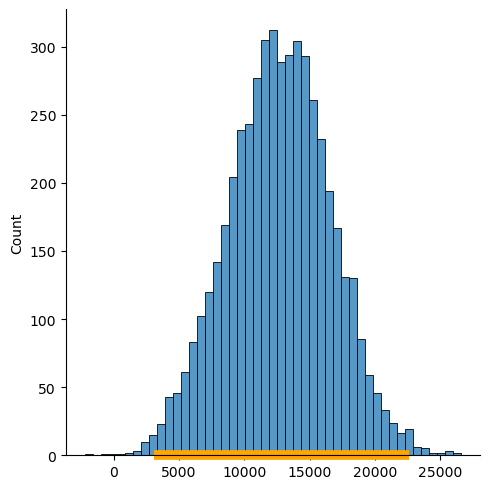

In [7]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 0.5, method='higher')
right_end = np.percentile(bstrap_diffs, 99.5, method='higher')
print('The 99% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);

The 95% boostsrap confidence interval for difference between population means [4942.6024189646705, 20328.38869733794]


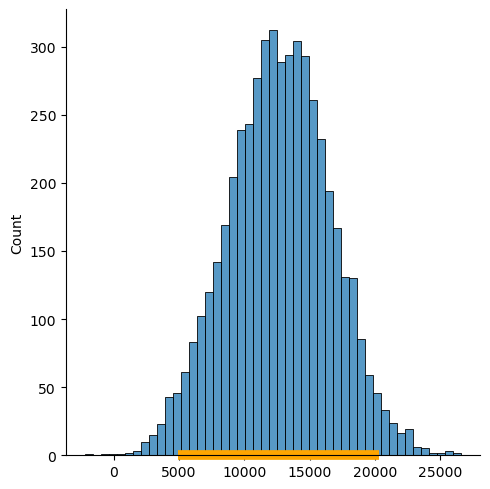

In [8]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 2.5, method='higher')
right_end = np.percentile(bstrap_diffs, 97.5, method='higher')
print('The 95% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);

e) for both level of significance 0.95 and 0.99 we rejact H0 because the value 0 that represents equal salary averages is out of the confidence interval

## 3

The 95% boostsrap confidence interval for medium size company mean salary [153706.5256837892, 159333.0]


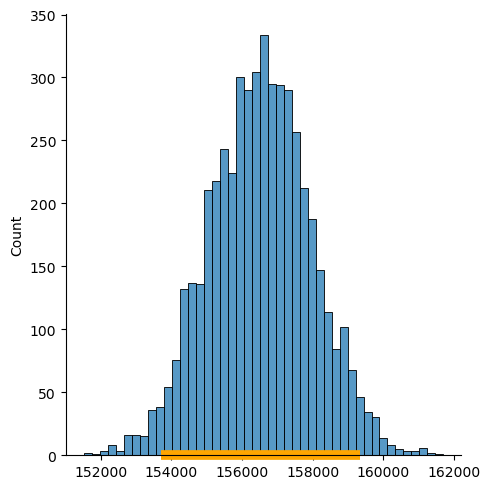

In [9]:
def avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    means = grpby_var[column_name].mean()
    return means.loc["M"]

def bootstrap_mean(original_sample, column_name, grouping_var, num_replications):
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    return bstrap_mean_diffs

bstrap_diffs = bootstrap_mean(df, 'salary_in_usd', 'company_size',  5000)

# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 2.5, method='higher')
right_end = np.percentile(bstrap_diffs, 97.5, method='higher')
print('The 95% boostsrap confidence interval for medium size company mean salary', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False);

using the original satmple we created 5000 samples in the same size and we checkd what is the mean salary of a medium size companies workers

## 4

a)

In [10]:
filtered_df = df[(df['remote_ratio']=='hybrid')]
real_median = df["salary_in_usd"].median()

def bootstrap_median(original_sample, column_name, num_replications):
    original_sample_size = original_sample.shape[0]
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_medians = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(n=original_sample_size, replace=True)
        resampled_median = bootstrap_sample.quantile(0.5, interpolation='higher')
        bstrap_medians[i] = resampled_median
    return bstrap_medians


lest_ends = np.empty(100)
right_ends = np.empty(100)
median_in_interval = []

for i in range(100):  
    sample = filtered_df.sample(n=150)
    bstrap= bootstrap_median(sample, 'salary_in_usd', 5000)
    left = np.percentile(bstrap, 2.5, method='higher')
    lest_ends[i] = left
    right = np.percentile(bstrap, 97.5, method='higher')
    right_ends[i] = right
    
    median_in_interval.append((real_median<right)and(real_median>left))

in_interval = np.count_nonzero(median_in_interval)
in_interval

96

as we can see from the counter value and the visualizsion, the worker gets it right 96 times out of a 100.

b) No. When taking a sample from a different population, the sample does not hold the original population attributes. Therefore, when “duplicating” the sample using the bootstrap method, we will not be able to imitate the original population characteristics.

c)

In [12]:
filtered_df=df[(df['remote_ratio']=='hybrid')]
filtered_df.head()
    
def bootstrap_Q1(original_sample,column_name,num_replications):
    original_sample_size=original_sample.shape[0]
    original_sample_var_of_interest=original_sample[[column_name]]
    bstrap_quantiles=np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample=original_sample_var_of_interest.sample(n=original_sample_size,replace=True)
        resampled_quantile=bootstrap_sample.quantile(0.25,interpolation='higher')
        bstrap_quantiles[i]=resampled_quantile
    return bstrap_quantiles


real_Q1=df['salary_in_usd'].quantile(0.25,interpolation='higher')
left_ends=[]
right_ends=[]
Q1_in_interval=[]

for i in range(100):
    hybrid_sample=filtered_df.sample(150,replace=False)
    quantiles=bootstrap_Q1(hybrid_sample,'salary_in_usd',5000)
    
    left=np.percentile(quantiles,2.5,method='higher')
    left_ends.append(left)
    right=np.percentile(quantiles,97.5,method='higher')
    right_ends.append(right)

    Q1_in_interval.append((real_Q1<right)and(real_Q1>left))
    
in_interval = np.count_nonzero(Q1_in_interval)
in_interval

83

as we can see, only 83 of the bootstraps that we did have cachet the real Q1 value, so we can conclude that this methos will not work for this type of data, because it is less than the 95% level of significant.
from the senior in b), it will nor work for the same rezone.